In [21]:
import pandas as pd
import numpy as np
from plotnine import * 

In [5]:
train = pd.read_csv("/Users/jinyoungpark/Desktop/Projects/Titanic/train.csv")

In [3]:
test = pd.read_csv("/Users/jinyoungpark/Desktop/Projects/Titanic/test.csv")

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
train.groupby('Sex')['Survived'].size()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [45]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [57]:
t = train.pivot_table(index=['Sex'], values=['Survived'], aggfunc='mean')

In [58]:
t

,Survived
Sex,
female,0.742038
male,0.188908


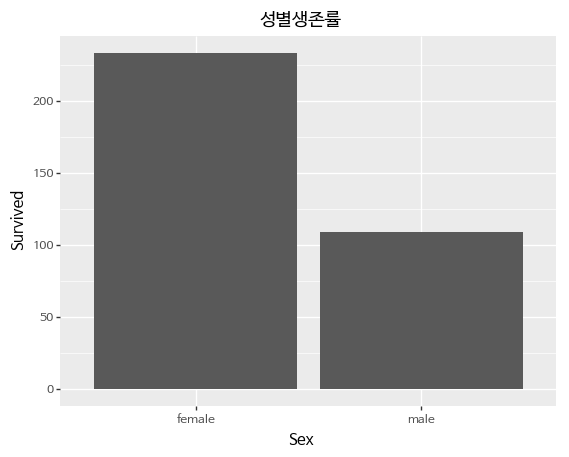

<ggplot: (7542806578)>

In [60]:

(ggplot(train)
+ aes(x='Sex', y='Survived')
+ geom_col()
+ ggtitle("성별생존률")
+ theme(text=element_text(family="NanumBarunGothic"))
)
#생존률이니까 %를 넣어주면 더 좋을 것 같다

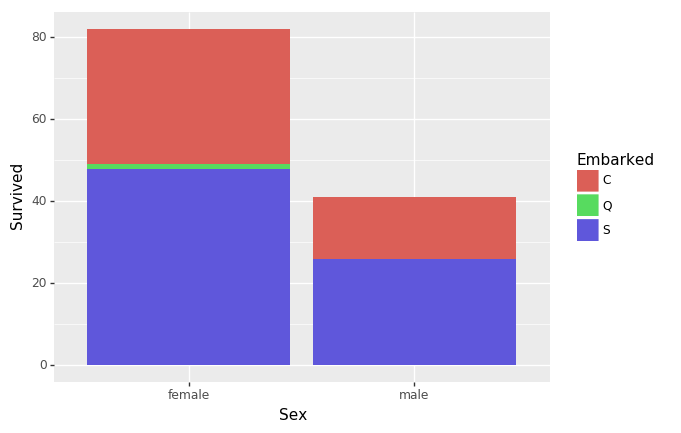

<ggplot: (7537098006)>

In [12]:
train=train.dropna()
(
ggplot(train)
    + aes (x='Sex', y='Survived', fill='Embarked')
    + geom_col()
   # + stat_smooth()
)

#Embarked에 결측치가 2개 있어서 에러가 남

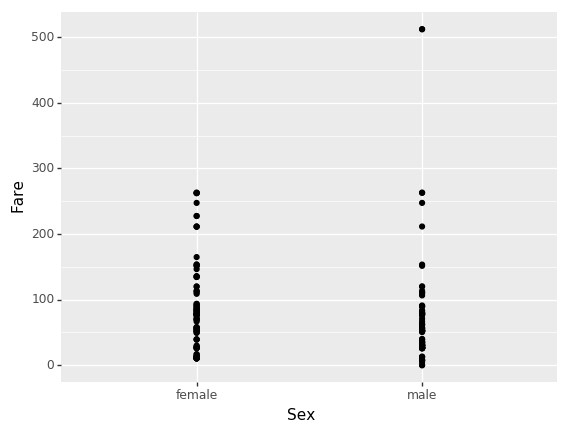

<ggplot: (7549202552)>

In [13]:
#points=['#EE0B5C','#0BEE9D']

(ggplot(train, aes('Sex','Fare', 'Survived'))
 + geom_point()
 #+ aes(color=points)
)

In [14]:
train.Embarked.isnull().sum()

0

In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
# PassengerId      0
# Survived         0
# Pclass           0
# Name             0
# Sex              0
# Age            177
# SibSp            0
# Parch            0
# Ticket           0
# Fare             0
# Cabin          687
# Embarked         2
# dtype: int64
    
# colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']
# (ggplot(train)
#      + aes('Pclass', 'Survived')
#      + aes(color='colors')
#      + geom_point()
# )

In [18]:
train['Survived'] = train['Survived'].astype('int')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

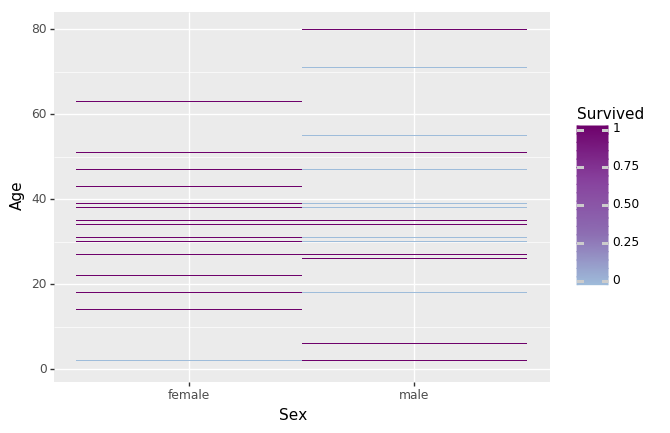

<ggplot: (7549339035)>

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()

(ggplot(train)
+ aes('Sex','Age', fill='Survived')
+ geom_tile()
+ scale_fill_gradientn(colors=['#9ebcda','#8c6bb1','#88419d','#6e016b']) 
)

In [20]:
train["Survived"].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [45]:
test['Survived'] = ((test['Sex'] == 'female')|(test['Age']<=9)|((test["Sex"]=='male')&(test['Pclass']!=3)))

In [25]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [26]:
%pwd

'/Users/jinyoungpark/Desktop/Projects/Titanic'

In [46]:
submission = test[['PassengerId','Survived']].copy()

In [47]:
submission['Survived']=submission['Survived'].astype(int)

In [48]:
submission['Survived']

0      0
1      1
2      1
3      0
4      1
5      0
6      1
7      1
8      1
9      0
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     0
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     0
26     1
27     0
28     1
29     0
      ..
388    0
389    1
390    1
391    1
392    0
393    1
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    1
402    1
403    1
404    1
405    1
406    1
407    1
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [49]:
submission.to_csv('/Users/jinyoungpark/Desktop/Projects/Titanic/submission_fourth.csv', index=False)

In [ ]:
submission.head()

In [50]:
s = pd.read_csv('/Users/jinyoungpark/Desktop/Projects/Titanic/submission_fourth.csv')

In [51]:
s

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0
